Patter Recognition
===
### Dimmensionality Reduction Project - Digits Dataset

* **Professor:**  Alexandre L. M. Levada
* **Students:**
  *    Wesley Nogueira Galvão 
*    


In [1]:
%load_ext autoreload
%autoreload 2

# Importing Libraries



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score


import os


# Load the dataset
from sklearn.datasets import load_digits

import dimensionality_reduction
from utils import plot_embeddings

# Digits

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

## EDA

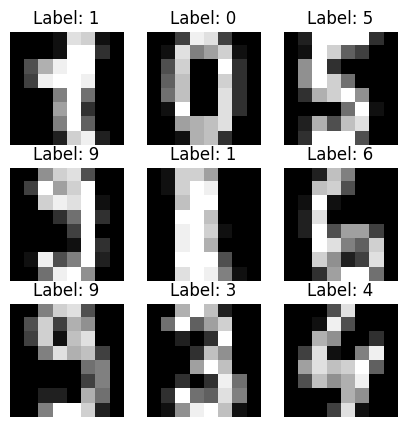

In [3]:
digits = load_digits()

images = digits.images
labels = digits.target

# Selecionar aleatoriamente 9 índices
random_indices = np.random.choice(len(images), 9, replace=False)

# Configurar subplot para exibir 3x3 imagens
fig, axes = plt.subplots(3, 3, figsize=(5, 5))

for i, ax in enumerate(axes.flat):
    # Obter índice aleatório
    idx = random_indices[i]

    # Exibir imagem
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"Label: {labels[idx]}")
    ax.axis('off')

# Mostrar o plot
plt.show()

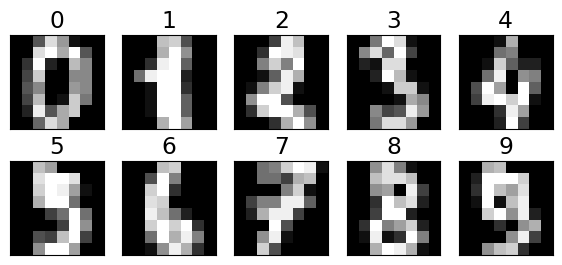

In [78]:
plt.rcParams['font.size'] = 14
nrows, ncols = 2, 5
plt.figure(figsize=(7,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.savefig('results/digits/digits-generated.pdf', dpi=150, bbox_inches='tight')

In [51]:
# Dataset label distribution

# Contar o número de ocorrências de cada label
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [90]:
images.shape

(1797, 8, 8)

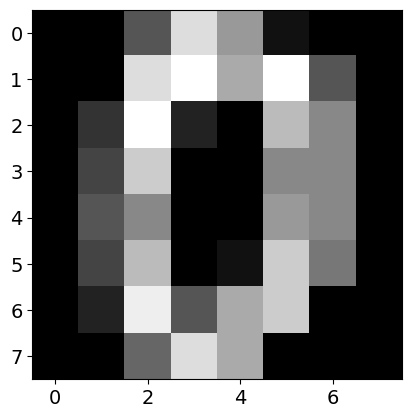

In [85]:
imshow = plt.imshow(digits.images[0], cmap='gray')

In [93]:
np.max(digits.images)

16.0

In [83]:
features = digits.data
labels = digits.target
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [91]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [84]:
labels[0]

0

# Dimensionality Reduction - Supervised Models

In [9]:
# Define the number of runs
n_runs = 20

In [4]:
images = digits.data
labels = digits.target

# Create an instance of ModelEvaluation for digits dataset
dr = dimensionality_reduction.DimensonalityReduction(
    X=images,
    y=labels,
    scaler=True,
    random_state=None,
    test_size=.50
)


# Define models to evaluate
models_to_evaluate = {    
    'Perceptron': [Perceptron(max_iter=2000), 'supervised'],
    'Logistic Regression': [LogisticRegression(max_iter=2000), 'supervised'],
    'MLP': [MLPClassifier(max_iter=2000), 'supervised'],
    'KNN':[KNeighborsClassifier(n_neighbors=7), 'supervised'],
    'Nearest Centroid': [NearestCentroid(), 'supervised'],
    'QDA': [QuadraticDiscriminantAnalysis(), 'supervised'],
    'Linear SVM': [SVC(kernel='linear', max_iter=2000), 'supervised'],
    'RBF SVM': [SVC(kernel='rbf', max_iter=2000), 'supervised'],
    # Add more models to evaluate here
}

### RAW data

In [54]:
%%time
# Evaluate models without dimensionality reduction
digits_raw = dr.run_multiple_training(models_to_evaluate, use_reduction=False, n_runs=n_runs)
digits_raw.to_csv('results/digits/digits_raw.csv', index=False)
digits_raw


Overall Progress:  25%|██▌       | 2/8 [00:00<00:02,  2.42it/s]

------Nearest Centroid : Runs Progress: 100%|██████████| 20/20 [00:00<00:00, 937.65it/s]
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variable

CPU times: user 1min 3s, sys: 2.7 s, total: 1min 5s
Wall time: 9.25 s


,model,Raw Data avg acc,Raw Data std acc
0,Perceptron,0.912125,0.000
1,Logistic Regression,0.957731,0.000
2,MLP,0.964071,0.003
3,KNN,0.956618,0.000
4,Nearest Centroid,0.875417,0.000
5,QDA,0.877642,0.000
6,Linear SVM,0.975528,0.000
7,RBF SVM,0.973304,0.000


### PCA

In [55]:
%%time
digits_PCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='PCA', n_runs=n_runs, n_components=20)
digits_PCA.to_csv('results/digits/digits_PCA.csv', index=False)
digits_PCA

Overall Progress:  12%|█▎        | 1/8 [00:00<00:01,  5.66it/s]

Overall Progress: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]

CPU times: user 1min 19s, sys: 3.74 s, total: 1min 22s
Wall time: 10.4 s


,model,PCA avg acc,PCA std acc
0,Perceptron,0.884427,0.0167
1,Logistic Regression,0.931313,0.0010
2,MLP,0.954449,0.0028
3,KNN,0.953393,0.0006
4,Nearest Centroid,0.869077,0.0006
5,QDA,0.950612,0.0013
6,Linear SVM,0.959399,0.0012
7,RBF SVM,0.962736,0.0006


### LDA

In [10]:
%%time
digits_LDA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='LDA', n_runs=n_runs, n_components=9)
digits_LDA.to_csv('results/digits/digits_LDA.csv', index=False)
digits_LDA

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  75%|███████▌  | 6/8 [00:11<00:03,  1.57s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-proc

CPU times: user 1min 36s, sys: 4.1 s, total: 1min 40s
Wall time: 12.6 s


,model,LDA avg acc,LDA std acc
0,Perceptron,0.919911,0.0000
1,Logistic Regression,0.937709,0.0000
2,MLP,0.940768,0.0031
3,KNN,0.943270,0.0000
4,Nearest Centroid,0.928810,0.0000
5,QDA,0.941046,0.0000
6,Linear SVM,0.939933,0.0000
7,RBF SVM,0.946607,0.0000


### Kernel PCA

In [57]:
%%time
digits_KernelPCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='KernelPCA', n_runs=n_runs, n_components=20)
digits_KernelPCA.to_csv('results/digits/digits_KernelPCA.csv', index=False)
digits_KernelPCA

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 8/8 [00:15<00:00,  1.96s/it]

CPU times: user 2min, sys: 4.17 s, total: 2min 4s
Wall time: 15.7 s


,model,KernelPCA avg acc,KernelPCA std acc
0,Perceptron,0.906563,0.0000
1,Logistic Regression,0.932147,0.0000
2,MLP,0.953226,0.0033
3,KNN,0.953281,0.0000
4,Nearest Centroid,0.868743,0.0000
5,QDA,0.951057,0.0000
6,Linear SVM,0.959956,0.0000
7,RBF SVM,0.962180,0.0000


### ISOMAP

In [58]:
%%time
digits_Isomap = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Isomap', n_runs=n_runs, n_components=20)
digits_Isomap.to_csv('results/digits/digits_Isomap.csv', index=False)
digits_Isomap

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 8/8 [00:44<00:00,  5.56s/it]

CPU times: user 5min 40s, sys: 15.2 s, total: 5min 55s
Wall time: 44.5 s


,model,Isomap avg acc,Isomap std acc
0,Perceptron,0.874305,0.0000
1,Logistic Regression,0.943270,0.0000
2,MLP,0.943993,0.0039
3,KNN,0.929922,0.0000
4,Nearest Centroid,0.906563,0.0000
5,QDA,0.918799,0.0000
6,Linear SVM,0.941046,0.0000
7,RBF SVM,0.943270,0.0000


### LLE

In [59]:
%%time
digits_LocalLinearEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Localembed', n_runs=n_runs, n_components=20)
digits_LocalLinearEmbedding.to_csv('results/digits/digits_LocalLinearEmbedding.csv', index=False)
digits_LocalLinearEmbedding

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  62%|██████▎   | 5/8 [00:40<00:22,  7.53s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings

CPU times: user 6min 21s, sys: 15.3 s, total: 6min 36s
Wall time: 49.7 s


,model,Localembed avg acc,Localembed std acc
0,Perceptron,0.864294,0.0000
1,Logistic Regression,0.939933,0.0000
2,MLP,0.955506,0.0012
3,KNN,0.948832,0.0000
4,Nearest Centroid,0.936596,0.0000
5,QDA,0.906563,0.0000
6,Linear SVM,0.922136,0.0000
7,RBF SVM,0.946607,0.0000


### Spectral Embedding

In [60]:
%%time
digits_SpectralEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='SpectEmbed', n_runs=n_runs, n_components=20)
digits_SpectralEmbedding.to_csv('results/digits/digits_SpectralEmbedding.csv', index=False)
digits_SpectralEmbedding

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  25%|██▌       | 2/8 [00:09<00:27,  4.65s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Convergen

CPU times: user 12min 22s, sys: 34.7 s, total: 12min 57s
Wall time: 1min 37s


,model,SpectEmbed avg acc,SpectEmbed std acc
0,Perceptron,0.047831,0.0000
1,Logistic Regression,0.097887,0.0000
2,MLP,0.077086,0.0142
3,KNN,0.192436,0.0000
4,Nearest Centroid,0.071190,0.0000
5,QDA,0.193548,0.0000
6,Linear SVM,0.097887,0.0000
7,RBF SVM,0.086763,0.0000


### TSNE

In [61]:
%%time
digits_Tsne = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Tsne', n_runs=n_runs, n_components=3)
digits_Tsne.to_csv('results/digits/digits_Tsne.csv', index=False)
digits_Tsne


Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  75%|███████▌  | 6/8 [06:36<02:08, 64.15s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-proc

CPU times: user 1h 7min 11s, sys: 1min 36s, total: 1h 8min 47s
Wall time: 8min 36s


,model,Tsne avg acc,Tsne std acc
0,Perceptron,0.134038,0.0506
1,Logistic Regression,0.144438,0.0321
2,MLP,0.087430,0.0185
3,KNN,0.119689,0.0214
4,Nearest Centroid,0.110957,0.0247
5,QDA,0.073526,0.0120
6,Linear SVM,0.111457,0.0117
7,RBF SVM,0.110567,0.0139


## Data summarizing

In [62]:

# Set model as index
digits_raw.set_index('model', inplace=True)
digits_PCA.set_index('model', inplace=True)
digits_LDA.set_index('model', inplace=True)
digits_KernelPCA.set_index('model', inplace=True)
digits_Isomap.set_index('model', inplace=True)
digits_LocalLinearEmbedding.set_index('model', inplace=True)
digits_SpectralEmbedding.set_index('model', inplace=True)
digits_Tsne.set_index('model', inplace=True)

In [63]:
all_results = pd.concat([digits_raw, digits_PCA, digits_LDA, digits_KernelPCA, digits_Isomap, digits_LocalLinearEmbedding, digits_SpectralEmbedding, digits_Tsne], axis=1)
all_results.to_csv('results/digits/all_digits_supervised.csv')

In [64]:
# Select columns which contain the word avg
all_digits_avg_acc = all_results.filter(like='avg')
all_digits_avg_acc.to_csv('results/digits/all_digits_supervised_avg_acc.csv')
all_digits_avg_acc


,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
model,,,,,,,,
Perceptron,0.912125,0.884427,0.903226,0.906563,0.874305,0.864294,0.047831,0.134038
Logistic Regression,0.957731,0.931313,0.929922,0.932147,0.943270,0.939933,0.097887,0.144438
MLP,0.964071,0.954449,0.937653,0.953226,0.943993,0.955506,0.077086,0.087430
KNN,0.956618,0.953393,0.945495,0.953281,0.929922,0.948832,0.192436,0.119689
Nearest Centroid,0.875417,0.869077,0.936596,0.868743,0.906563,0.936596,0.071190,0.110957
QDA,0.877642,0.950612,0.943270,0.951057,0.918799,0.906563,0.193548,0.073526
Linear SVM,0.975528,0.959399,0.936596,0.959956,0.941046,0.922136,0.097887,0.111457
RBF SVM,0.973304,0.962736,0.951057,0.962180,0.943270,0.946607,0.086763,0.110567


In [65]:
all_digits_avg_acc = pd.read_csv('results/digits/all_digits_supervised_avg_acc.csv')
all_digits_avg_acc

,model,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
0,Perceptron,0.912125,0.884427,0.903226,0.906563,0.874305,0.864294,0.047831,0.134038
1,Logistic Regression,0.957731,0.931313,0.929922,0.932147,0.943270,0.939933,0.097887,0.144438
2,MLP,0.964071,0.954449,0.937653,0.953226,0.943993,0.955506,0.077086,0.087430
3,KNN,0.956618,0.953393,0.945495,0.953281,0.929922,0.948832,0.192436,0.119689
4,Nearest Centroid,0.875417,0.869077,0.936596,0.868743,0.906563,0.936596,0.071190,0.110957
5,QDA,0.877642,0.950612,0.943270,0.951057,0.918799,0.906563,0.193548,0.073526
6,Linear SVM,0.975528,0.959399,0.936596,0.959956,0.941046,0.922136,0.097887,0.111457
7,RBF SVM,0.973304,0.962736,0.951057,0.962180,0.943270,0.946607,0.086763,0.110567


In [66]:
all_digits_avg_acc.describe()

,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.936555,0.933176,0.935477,0.935894,0.925146,0.927558,0.108078,0.111513
std,0.041889,0.036283,0.014551,0.032702,0.024664,0.030009,0.054817,0.022936
min,0.875417,0.869077,0.903226,0.868743,0.874305,0.864294,0.047831,0.073526
25%,0.903504,0.919591,0.934928,0.925751,0.915740,0.918242,0.075612,0.104783
50%,0.957175,0.952002,0.937125,0.952141,0.935484,0.938265,0.092325,0.111207
75%,0.966379,0.955687,0.943826,0.954950,0.943270,0.947164,0.121524,0.123276
max,0.975528,0.962736,0.951057,0.962180,0.943993,0.955506,0.193548,0.144438


# Dimensionality Reduction - Unsupervised Models

In [67]:
digits = load_digits()
images = digits.data
labels = digits.target

# Create an instance of ModelEvaluation for digits dataset
dr = dimensionality_reduction.DimensonalityReduction(
    X=images,
    y=labels,
    scaler=True,
    random_state=None,
    split_data=False
)

# Define models to evaluate
models_to_evaluate = {
    'KMeans': [KMeans(n_clusters=10, n_init=10), 'unsupervised'],
    'GMM': [GaussianMixture(n_components=10), 'unsupervised'],
    # Add more models to evaluate here
}

### RAW data

In [68]:
%%time
# Evaluate models without dimensionality reduction
digits_raw = dr.run_multiple_training(models_to_evaluate, use_reduction=False, n_runs=n_runs)
digits_raw.to_csv('results/digits/digits_raw_unsupervised.csv', index=False)
digits_raw


Overall Progress:  50%|█████     | 1/2 [00:00<00:00,  1.41it/s]

Overall Progress: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

CPU times: user 25.8 s, sys: 1.01 s, total: 26.8 s
Wall time: 3.36 s


,model,Raw Data avg rand_score,Raw Data std rand_score
0,KMeans,0.667839,0.0028
1,GMM,0.643400,0.0393


### PCA

In [69]:
%%time
digits_PCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='PCA', n_runs=n_runs, n_components=20)
digits_PCA.to_csv('results/digits/digits_PCA_unsupervised.csv', index=False)
digits_PCA

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

CPU times: user 13.4 s, sys: 557 ms, total: 14 s
Wall time: 1.76 s


,model,PCA avg rand_score,PCA std rand_score
0,KMeans,0.666901,0.0043
1,GMM,0.724035,0.0626


### LDA

In [70]:
%%time
digits_LDA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='LDA', n_runs=n_runs, n_components=8)
digits_LDA.to_csv('results/digits/digits_LDA_unsupervised.csv', index=False)
digits_LDA

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

CPU times: user 7.71 s, sys: 482 ms, total: 8.19 s
Wall time: 1.05 s


,model,LDA avg rand_score,LDA std rand_score
0,KMeans,0.918066,0.0011
1,GMM,0.892060,0.0428


### Kernel PCA

In [71]:
%%time
digits_KernelPCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='KernelPCA', n_runs=n_runs, n_components=20)
digits_KernelPCA.to_csv('results/digits/digits_KernelPCA_unsupervised.csv', index=False)
digits_KernelPCA

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:08<00:00,  4.21s/it]

CPU times: user 1min 4s, sys: 2.42 s, total: 1min 7s
Wall time: 8.42 s


,model,KernelPCA avg rand_score,KernelPCA std rand_score
0,KMeans,0.667567,0.0025
1,GMM,0.709278,0.0358


### ISOMAP

In [72]:
%%time
digits_Isomap = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Isomap', n_runs=n_runs, n_components=20)
digits_Isomap.to_csv('results/digits/digits_Isomap_unsupervised.csv', index=False)
digits_Isomap

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/scipy/sparse/_index.py:1

CPU times: user 2min 21s, sys: 4.87 s, total: 2min 26s
Wall time: 36.1 s


,model,Isomap avg rand_score,Isomap std rand_score
0,KMeans,0.803687,0.0139
1,GMM,0.782626,0.0411


### LLE

In [73]:
%%time
digits_LocalLinearEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Localembed', n_runs=n_runs, n_components=20)
digits_LocalLinearEmbedding.to_csv('results/digits/digits_LocalLinearEmbedding_unsupervised.csv', index=False)
digits_LocalLinearEmbedding

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:12<00:00,  6.42s/it]

CPU times: user 1min 38s, sys: 3.88 s, total: 1min 42s
Wall time: 12.8 s


,model,Localembed avg rand_score,Localembed std rand_score
0,KMeans,0.453686,0.0839
1,GMM,0.704424,0.0888


### Spectral Embedding

In [74]:
%%time
digits_SpectralEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='SpectEmbed', n_runs=n_runs, n_components=20)
digits_SpectralEmbedding.to_csv('results/digits/digits_SpectralEmbedding_unsupervised.csv', index=False)
digits_SpectralEmbedding

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:40<00:00, 20.30s/it]

CPU times: user 2min 47s, sys: 7.39 s, total: 2min 55s
Wall time: 40.6 s


,model,SpectEmbed avg rand_score,SpectEmbed std rand_score
0,KMeans,0.574005,0.0628
1,GMM,0.671667,0.0390


### TSNE

In [75]:
%%time
digits_Tsne = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Tsne', n_runs=n_runs, n_components=3)
digits_Tsne.to_csv('results/digits/digits_Tsne_unsupervised.csv', index=False)
digits_Tsne


Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [04:03<00:00, 121.76s/it]

CPU times: user 31min 47s, sys: 40.1 s, total: 32min 27s
Wall time: 4min 3s


,model,Tsne avg rand_score,Tsne std rand_score
0,KMeans,0.897332,0.0015
1,GMM,0.814455,0.0656


## Data summarizing

In [76]:

# Set model as index
digits_raw.set_index('model', inplace=True)
digits_PCA.set_index('model', inplace=True)
digits_LDA.set_index('model', inplace=True)
digits_KernelPCA.set_index('model', inplace=True)
digits_Isomap.set_index('model', inplace=True)
digits_LocalLinearEmbedding.set_index('model', inplace=True)
digits_SpectralEmbedding.set_index('model', inplace=True)
digits_Tsne.set_index('model', inplace=True)

In [77]:
all_results = pd.concat(
    [
        digits_raw,
        digits_PCA,
        digits_LDA,
        digits_KernelPCA,
        digits_Isomap,
        digits_LocalLinearEmbedding,
        digits_SpectralEmbedding,
        digits_Tsne
    ],
    axis=1
)
all_results.to_csv('results/digits/all_digits_unsupervised.csv')

In [78]:
# Select columns which contain the word avg
all_digits_avg_rand = all_results.filter(like='avg')
all_digits_avg_rand.to_csv('results/digits/all_digits_unsupervised_avg_rand.csv')
all_digits_avg_rand


,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
model,,,,,,,,
KMeans,0.667839,0.666901,0.918066,0.667567,0.803687,0.453686,0.574005,0.897332
GMM,0.643400,0.724035,0.892060,0.709278,0.782626,0.704424,0.671667,0.814455


In [79]:
all_digits_avg_rand = pd.read_csv('results/digits/all_digits_unsupervised_avg_rand.csv')
all_digits_avg_rand

,model,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
0,KMeans,0.667839,0.666901,0.918066,0.667567,0.803687,0.453686,0.574005,0.897332
1,GMM,0.643400,0.724035,0.892060,0.709278,0.782626,0.704424,0.671667,0.814455


In [80]:
all_digits_avg_rand.describe()

,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.655620,0.695468,0.905063,0.688422,0.793156,0.579055,0.622836,0.855894
std,0.017281,0.040400,0.018388,0.029494,0.014893,0.177299,0.069057,0.058602
min,0.643400,0.666901,0.892060,0.667567,0.782626,0.453686,0.574005,0.814455
25%,0.649510,0.681184,0.898562,0.677995,0.787891,0.516371,0.598421,0.835174
50%,0.655620,0.695468,0.905063,0.688422,0.793156,0.579055,0.622836,0.855894
75%,0.661729,0.709751,0.911564,0.698850,0.798422,0.641740,0.647252,0.876613
max,0.667839,0.724035,0.918066,0.709278,0.803687,0.704424,0.671667,0.897332


In [81]:
all_digits_avg_rand.describe().loc['mean'].sort_values(ascending=False)

LDA avg rand_score           0.905063
Tsne avg rand_score          0.855894
Isomap avg rand_score        0.793156
PCA avg rand_score           0.695468
KernelPCA avg rand_score     0.688422
Raw Data avg rand_score      0.655620
SpectEmbed avg rand_score    0.622836
Localembed avg rand_score    0.579055
Name: mean, dtype: float64

# Visualizing clusters in 2D

Here we will select the best two dimensionality reduction models and visualize the clusters in 2D.

## Ranking of dimensionality reduction methods with supervised models classifiers

In [1]:
# Sort by mean accuracy
all_digits_avg_acc.describe().loc['mean'].sort_values(ascending=False)

NameError: name 'all_digits_avg_acc' is not defined

## Ranking of dimensionality reduction methods with unsupervised models classifiers

In [83]:
all_digits_avg_rand.describe().loc['mean'].sort_values(ascending=False)

LDA avg rand_score           0.905063
Tsne avg rand_score          0.855894
Isomap avg rand_score        0.793156
PCA avg rand_score           0.695468
KernelPCA avg rand_score     0.688422
Raw Data avg rand_score      0.655620
SpectEmbed avg rand_score    0.622836
Localembed avg rand_score    0.579055
Name: mean, dtype: float64




Now, we will reduce the raw data to two components and visualize the clusters in 2D, colorizing each cloud of points according to the labels.

In [19]:
digits = load_digits()

images = digits.data
labels = digits.target

dr = dimensionality_reduction.DimensonalityReduction(
    X=images,
    y=labels,
    scaler=True,
    random_state=None,
    split_data=False
)

X_reduced_PCA, _ = dr.apply_PCA(n_components=2)
X_reduced_KPCA, _ = dr.apply_KernelPCA(n_components=2)
X_reduced_LDA, _ = dr.apply_LDA(n_components=2)
X_reduced_Isomap, _ = dr.apply_Isomap(n_components=2)
X_reduced_LLE, _ = dr.apply_Localembed(n_components=2)
X_reduced_SE, _ = dr.apply_SpectEmbed(n_components=2)
X_reduced_Tsne, _ = dr.apply_Tsne(n_components=2)


print("Features dataset shape before reduction:", X_reduced_PCA.shape)

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Features dataset shape before reduction: (1797, 2)


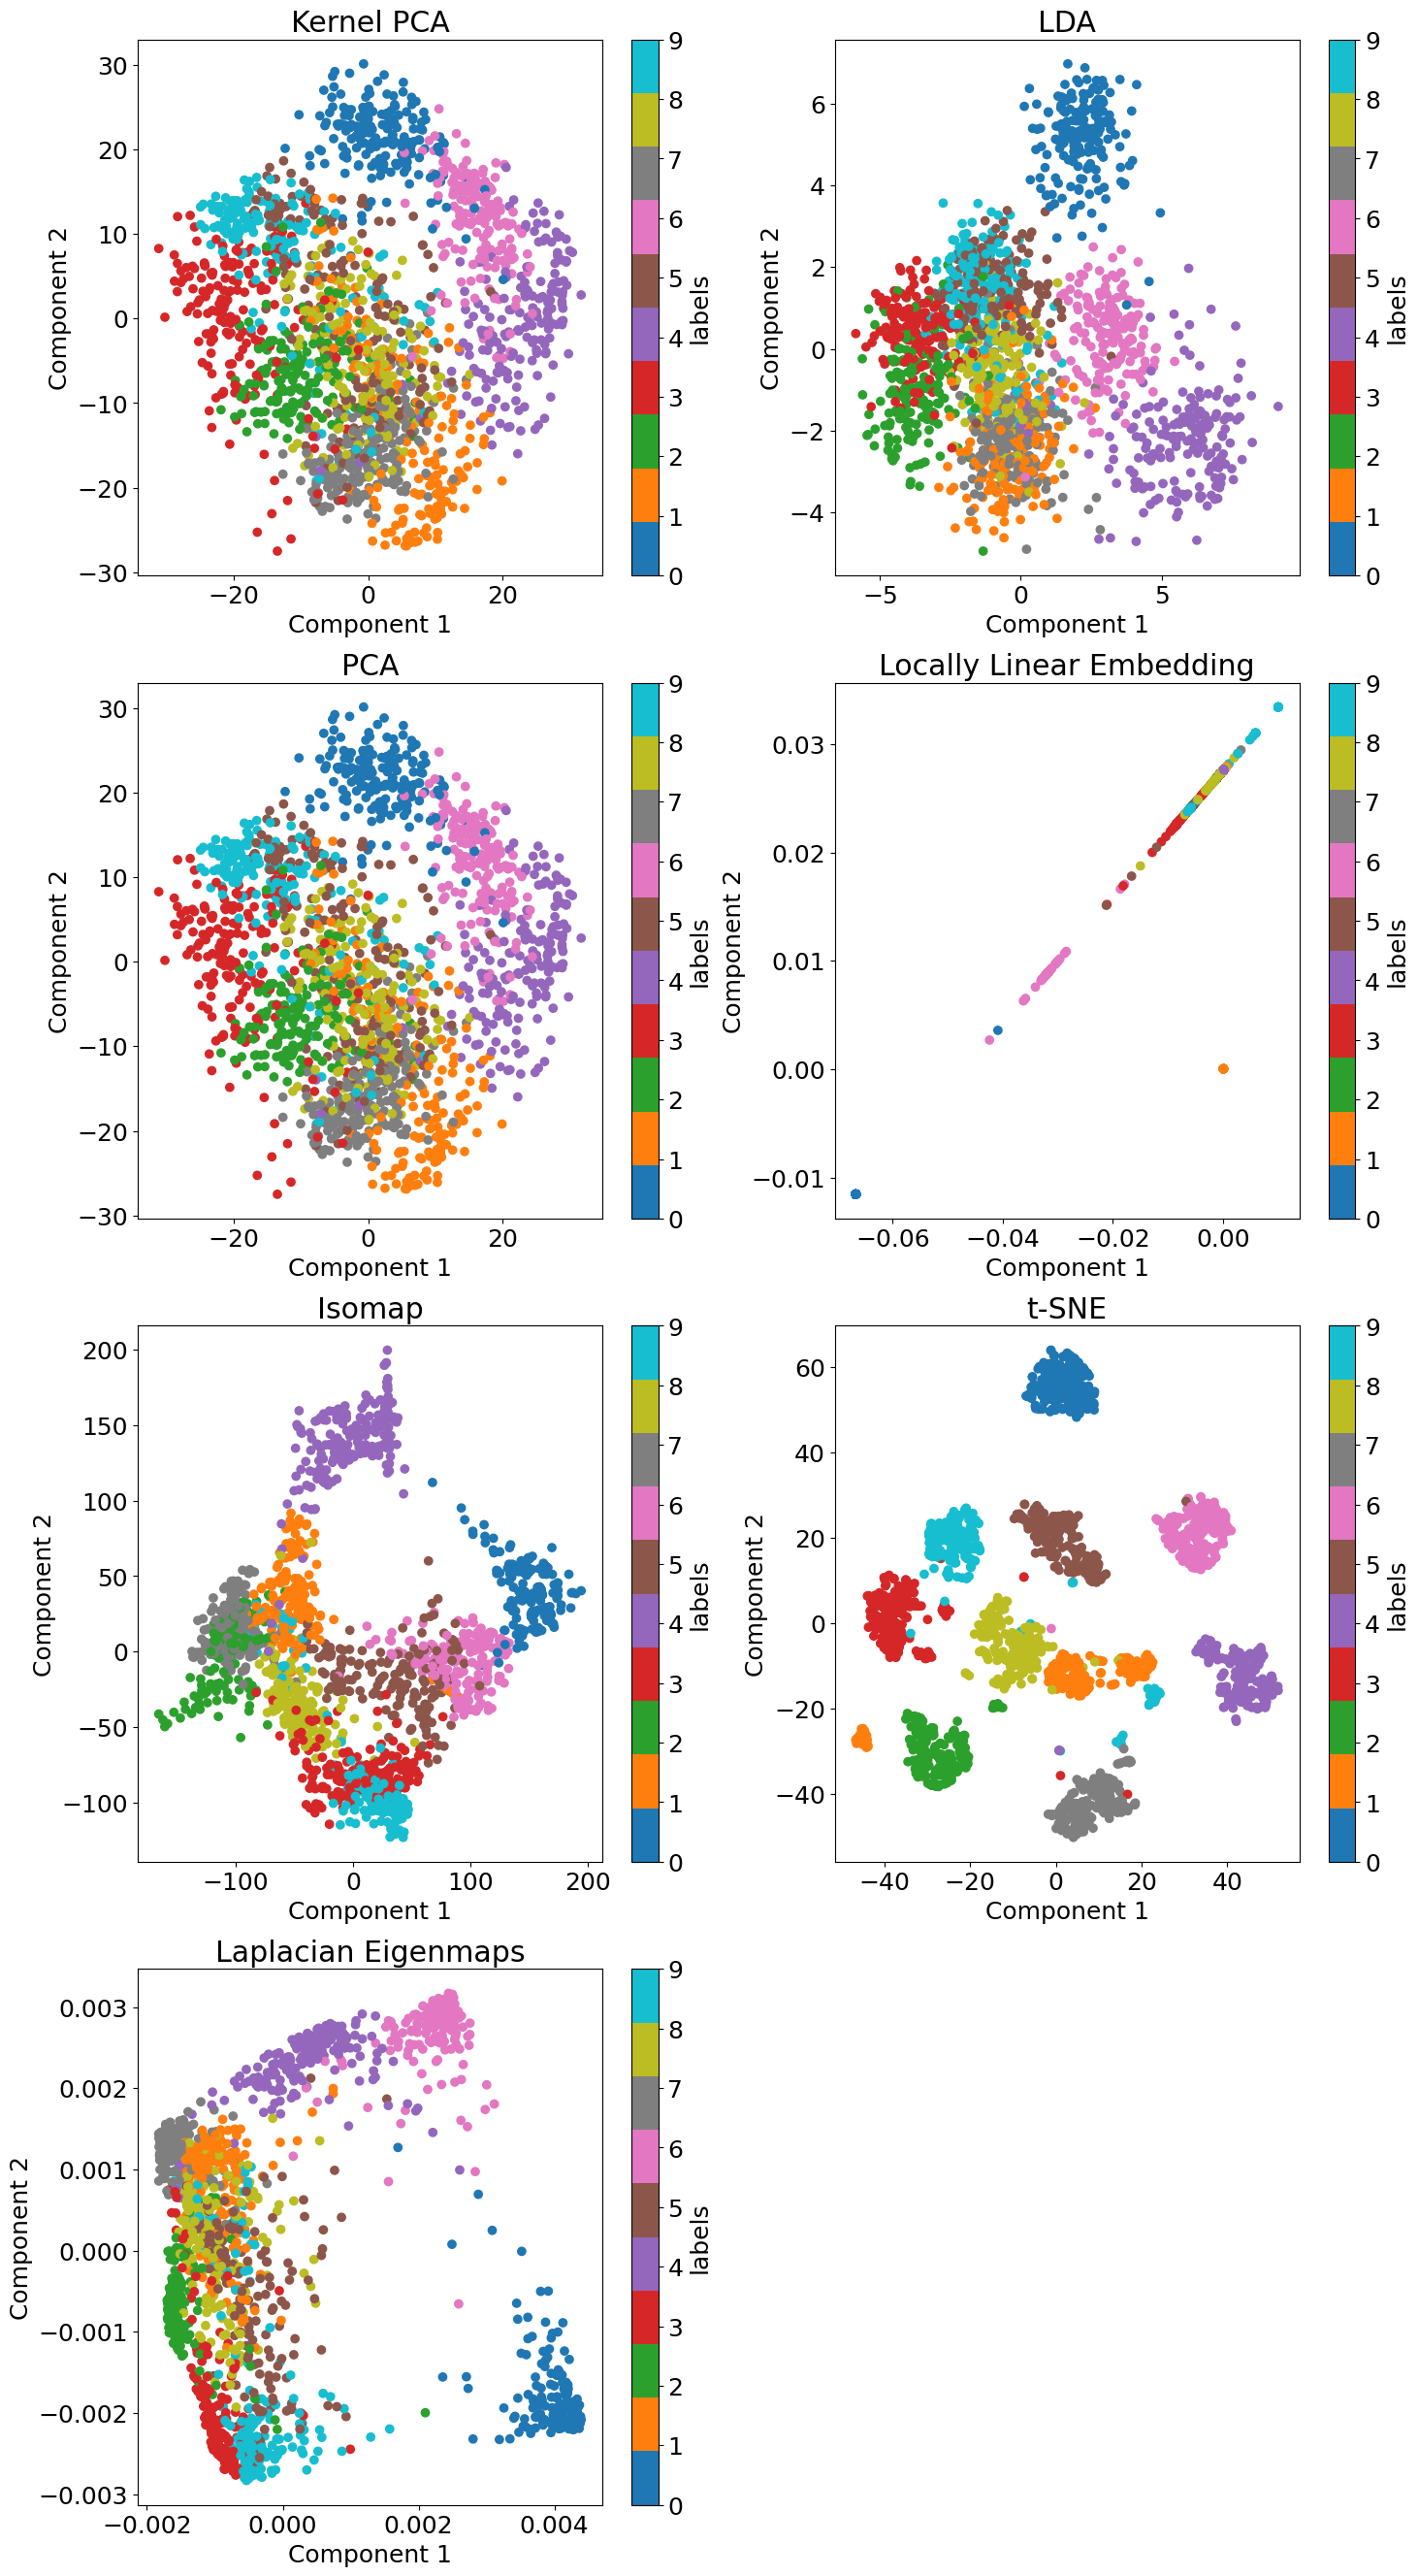

In [61]:
datasets = [X_reduced_PCA, X_reduced_LDA, X_reduced_KPCA, X_reduced_Isomap, X_reduced_LLE, X_reduced_SE, X_reduced_Tsne]
labels_ = [labels, labels,labels, labels, labels, labels, labels]

datasets = [X_reduced_KPCA,X_reduced_LDA,  X_reduced_PCA, X_reduced_LLE, X_reduced_Isomap, X_reduced_Tsne, X_reduced_SE]
titles = ['Kernel PCA', 'LDA',  'PCA', 'Locally Linear Embedding',  'Isomap', 't-SNE', 'Laplacian Eigenmaps']

plot_embeddings(
    datasets,
    labels_,
    titles,
    figsize=(17,33),
    ncols=2,
    dpi=100,
    save_as='results/digits/reduced_digits_2D_all_methods.pdf'
)